<a href="https://colab.research.google.com/github/ImolaFodor/probabilistic-ML/blob/main/HW03_pyro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install pyro-ppl

In [2]:
import pyro
import torch
import pyro.distributions as dist

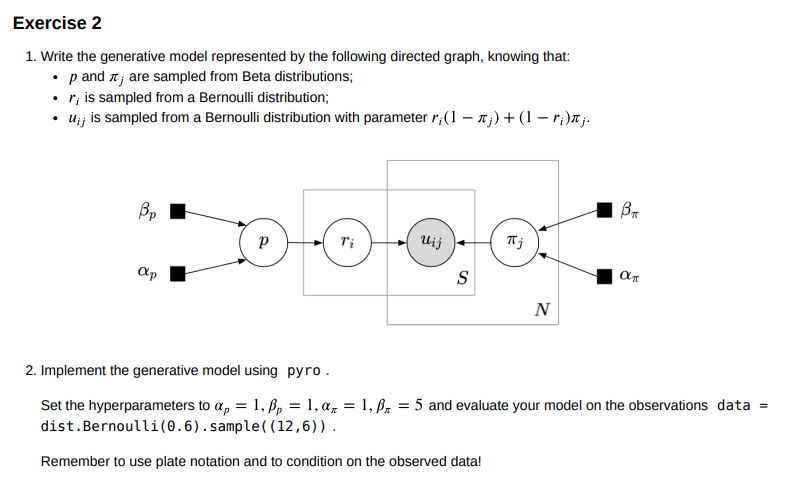


In [26]:
# number of components
S = 12
N = 6
 
# hyperparameters
alpha_p = 1
alpha_pi = 1
 
beta_p = 1
beta_pi = 5
 
def model(data, S, N):
    p = pyro.sample('p', dist.Beta(alpha_p, beta_p))
    p
    with pyro.plate('components', S):
        r = pyro.sample('r', dist.Bernoulli(probs = p))
        
    with pyro.plate('data', N):
        pi = pyro.sample('pi', dist.Beta(alpha_pi, beta_pi))
        with pyro.plate('components', S):
            u = pyro.sample('u', dist.Bernoulli(probs = torch.mul(r.reshape(1,-1).t(),(1-pi))+torch.mul((1-r.reshape(1,-1).t()),pi)))

    print("p =",p,"\nr =",r,"\npi =", pi,"\nu =", u)


data = dist.Bernoulli(0.6).sample((12,6))
print(model(data, S, N))

p = tensor(0.6990) 
r = tensor([1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1.]) 
pi = tensor([0.0372, 0.2582, 0.0688, 0.0358, 0.2256, 0.2253]) 
u = tensor([[1., 0., 1., 1., 1., 1.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 0., 1.],
        [0., 0., 0., 0., 1., 0.],
        [1., 0., 1., 1., 1., 1.],
        [1., 0., 1., 1., 1., 1.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [1., 0., 1., 0., 1., 1.],
        [1., 1., 1., 0., 1., 1.]])
None
